<a href="https://colab.research.google.com/github/20146467/TRITUENHANTAO/blob/main/AI_07_04_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt



In [ ]:

(train_X, train_Y),(test_X, test_Y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_X = train_X.reshape(60000, 28 ,28, 1)

In [ ]:
train_X.shape

(60000, 28, 28, 1)

In [ ]:
test_X.shape

(10000, 28, 28)

In [ ]:
test_Y.shape
train_Y.shape

(60000,)

In [ ]:
from keras.utils import to_categorical
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

test_Y.shape
train_Y.shape



(60000, 10)

In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras import losses


batch_size = 64
epochs = 20
classes = 10
loss = losses

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape = (28, 28, 1), padding = 'same')) #32 lần tích chập , kernel size 3x3
model.add(LeakyReLU(alpha = 0.1)) #1 dạng của bộ lọc
model.add(MaxPooling2D((2, 2), padding = 'same')) 

model.add(Conv2D(64, (3, 3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


In [ ]:
model.add(Flatten()) #chuyển ảnh thành vecto thông qua mạng ANN
model.add(Dense(128,activation='linear')) #128 phân lớp ẩn
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax')) #classes = 10
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [ ]:

from keras import optimizers
model.compile(loss = loss.categorical_crossentropy, optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [ ]:
model.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x7f18070353a0>>

In [ ]:
train = model.fit(train_X, train_Y, batch_size = batch_size, epochs = epochs, verbose = 1)


Epoch 1/20
938/938 [==============================] - 17s 5ms/step - loss: 0.5534 - accuracy: 0.8490
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2748 - accuracy: 0.8977
Epoch 3/20
938/938 [==============================] - 5s 5ms/step - loss: 0.2367 - accuracy: 0.9119
Epoch 4/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2142 - accuracy: 0.9204
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1990 - accuracy: 0.9256
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1853 - accuracy: 0.9308
Epoch 7/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1687 - accuracy: 0.9360
Epoch 8/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1578 - accuracy: 0.9403
Epoch 9/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1473 - accuracy: 0.9454
Epoch 10/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1316 - accuracy: 0.951

In [ ]:

eval = model.evaluate(test_X, test_Y, verbose = 0)  #verbose = 0: khong hien thi train
print('Test loss: ', eval[0])
print('Test accuracy: ', eval[1])

Test loss:  0.4414401948451996
Test accuracy:  0.9099000096321106


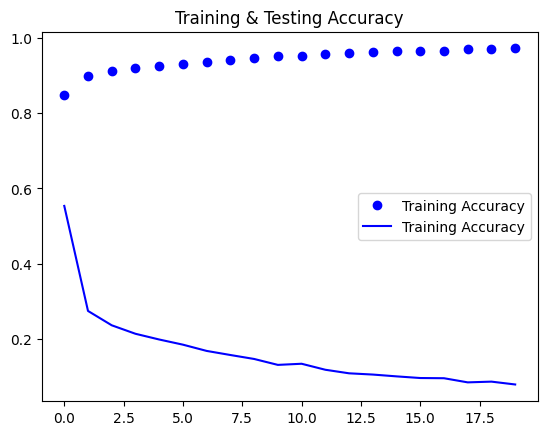

In [ ]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')   # 'bo' la dau tron
plt.plot(epochs, loss, 'b', label = 'Training Accuracy')
plt.title('Training & Testing Accuracy')
plt.legend() 
plt.show()

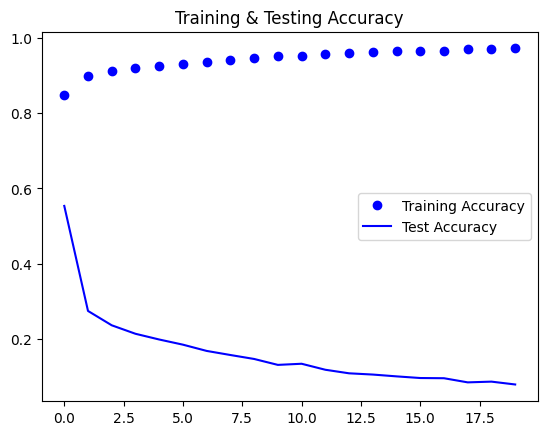

In [ ]:

accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')  
plt.plot(epochs, loss, 'b', label = 'Test Accuracy')
plt.title('Training & Testing Accuracy')
plt.legend() 
plt.show()

In [ ]:
from keras.layers.core.activation import Activation
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0,25)) # bỏ giá trị không cần thiết


In [ ]:
model.add(Conv2D(64,(3, 3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3 )))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))


In [ ]:
#ANN
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))



In [ ]:
from keras.optimizers import SGD
sgd = SGD(lr = 0.1,decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(loss='categorical_crossentropy',optimizer= sgd,metrics = ['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.save('/content/drive/content/sample_data/README.md  ')

In [ ]:
from os import listdir
from numpy import asarray ,save
from keras.preprocessing.image import load_img_to_array
folder =''
photos,labels = list(),list()
for file in listdir():
  output=0.0
  if file.startwith('Nguyen'):
    output=1.0
    if file.starswith('Hoang'):
      output2.0
      photo=load_img(folder+file,target_size(200,200))
      photo=img_to_array(img)
      photos.append(photo)
      labels.append(output)
      photos = asarray(photos)
      labels =asarray(labels)
      print(photos.shape,label.shape)
      save('     /NguyenHoang_photo.npy',photos)
      save('   /NguyenHoang_label.npy',labels)